Programming Assignment :  Regression

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)


Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



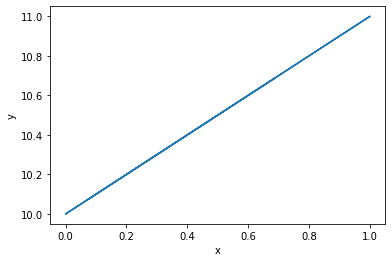

In [1]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
x=np.random.rand(1000)
w0=10
w1=1
y=(w1*x) + w0 
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

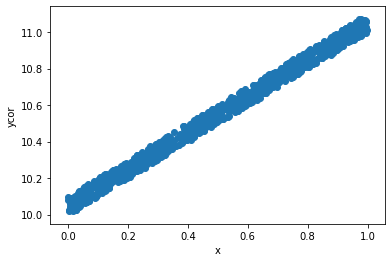

In [2]:
# write your code here
rand_samples=np.random.uniform(0,1,1000)
ycor=y+(0.1*rand_samples)
plt.scatter(x,ycor)
plt.xlabel('x')
plt.ylabel('ycor')
plt.show()

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

[1.07807808]


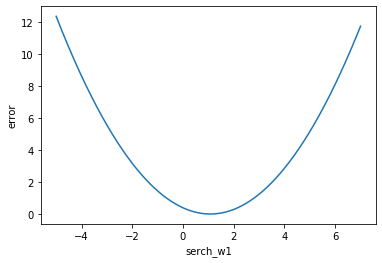

No handles with labels found to put in legend.


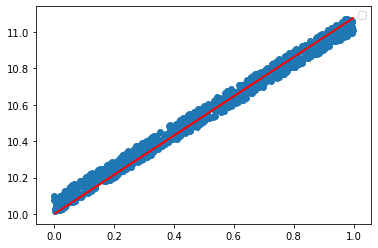

In [3]:
# implementation of heurastic search for 1 variable case
# write your code here
def error(ycor,ypred):
    e=0
    for j in range(1000):
        e=e+(ycor[j]-ypred[j])**2
    return e/1000
     

w0=10
err=np.zeros(1000)
#search space for w1
t=np.linspace(-5,7,1000)
for i in range(1000):
    w1=t[i]
    ypred=(w1*x)+w0
    err[i]= error(ycor,ypred)
least_err_index=np.where(err == np.amin(err))   # index of the least error
print(t[least_err_index])   #print the ypredbest: w1
ybest=((t[least_err_index])*x)+w0
#plt error vs srch_w1
plt.plot(t,err)
plt.ylabel('error')
plt.xlabel('serch_w1')
plt.show()
#plot scatter plot (x,ycor)
plt.scatter(x,ycor)
plt.plot(x,ybest,'r')
plt.legend(loc='best')
plt.show()

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

In [49]:
import random
w0=10
w1=random.randint(-5,7)
lambdaa = 0.1
y_pred=w1*x + w0
error2=(1/1000)*sum((ycor-y_pred)**2)
delta_err=(-2/1000)*sum((ycor-y_pred)*x)
w1_old=w1
w1_search=[]
err_search=[]
w1_new=0
while(delta_err> 1e-10):
    w1_search.append(w1_old)
    err_search.append(error2)
    w1_new=w1_old - (lambdaa*delta_err)
    y_pred=w1_new*x + w0
    error2=(1/1000)*sum((ycor-y_pred)**2)
    delta_err=(-2/1000)*sum((ycor-y_pred)*x)
    w1_old=w1_new
   
    
w1_new   

1.07686764477053

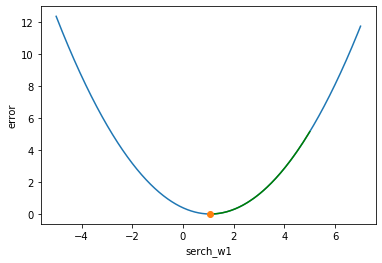

In [50]:
#plt error vs srch_w1
plt.plot(t,err)
plt.ylabel('error')
plt.xlabel('serch_w1')
plt.plot(w1_search,err_search, color='green')
plt.plot(w1_new,error2, marker="o")
plt.show()

No handles with labels found to put in legend.


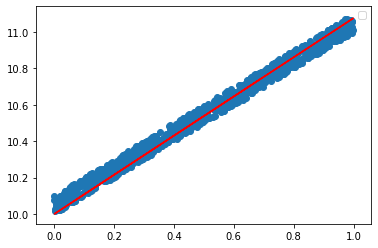

In [51]:
#plot scatter plot (x,ycor)
y_best=w1_new*x + w0
plt.scatter(x,ycor)
plt.plot(x,y_best,'r')
plt.legend(loc='best')
plt.show()

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

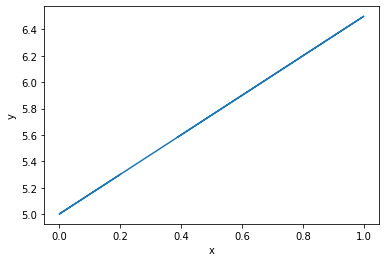

In [149]:
import numpy as np
import matplotlib.pyplot as plt
x=np.random.rand(1000)
w0=5
w1=1.5
y=(w1*x) + w0 
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

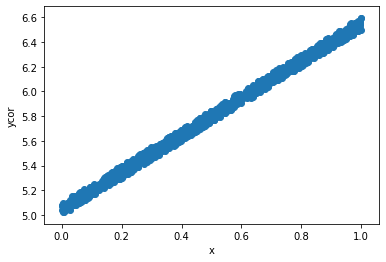

In [150]:
# write your code here
rand_samples=np.random.uniform(0,1,1000)
ycor=y+(0.1*rand_samples)
plt.scatter(x,ycor)
plt.xlabel('x')
plt.ylabel('ycor')
plt.show()

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

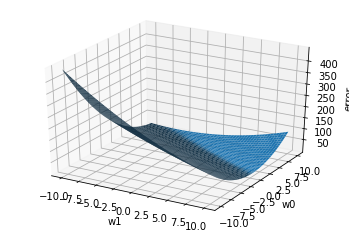

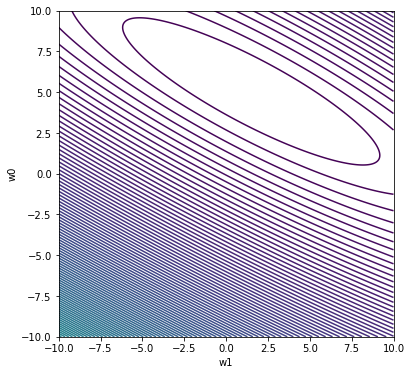

In [151]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
w1 = np.linspace(-10, 10, 1000)
w0 = np.linspace(-10,10,1000)
error = []
for i in w0 :
    for j in w1 :
        y_pred=j*x+i 
        error.append(1/1000*np.sum((np.array(y_pred)-np.array(ycor))**2))
    

W1, W0 = np.meshgrid(w1, w0) 
error = np.reshape(np.array(error),(len(w1),len(w0)))
ax = plt.axes(projection='3d')
ax.plot_surface(W1, W0, error)
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('error')
plt.show()
fig, ax = plt.subplots(figsize=(6,6))
ax.contour(W1,W0,error,levels=[i for i in np.arange(0,1000,5)])
ax.set_xlabel('w1')
ax.set_ylabel('w0')
plt.show()

d) Gradient descent:

1.5011649814862704 5.048457702313335


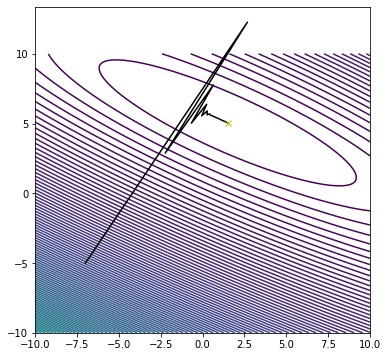

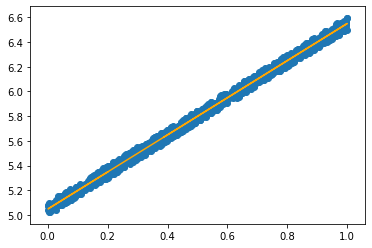

In [152]:
w1_init=[-7]
w0_init=[-5]
lr = 0.6
eps=0.000001
while True :
    y_pred = w1_init[-1]*x + w0_init[-1]
    delta_error_w1 = (np.mean((ycor-y_pred)*x))*-2*lr
    delta_error_w0 = (np.mean(ycor-y_pred))*-2*lr
    w1_init.append(w1_init[-1] - delta_error_w1)
    w0_init.append(w0_init[-1] - delta_error_w0)
    if((abs(round(delta_error_w1,7)) <= eps) and (abs(round(delta_error_w0,7)) <= eps)) :
        break
print(w1_init[-1],w0_init[-1])
fig, ax = plt.subplots(figsize=(6,6))
ax.contour(W1,W0,error,levels=[i for i in np.arange(0,1000,5)])
plt.plot(np.asarray(w1_init),np.asarray(w0_init),'black')  # w1 vs w1
plt.plot(w1_init[-1],w0_init[-1],'yx')  #w1 and w0 at which the the error is minimum
plt.show() 
plt.scatter(x,ycor)
plt.plot(x,w0_init[-1] + w1_init[-1]*x,c='orange')

#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

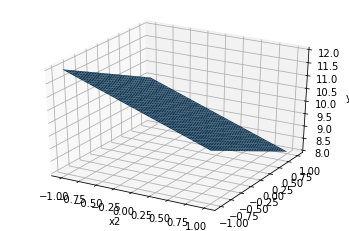

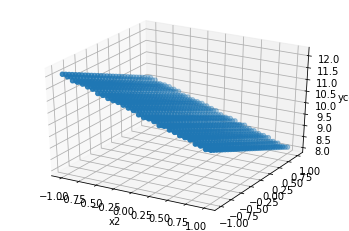

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
w0=10
w1=-1
w2=-1

X1, X2 = np.meshgrid(x1, x2)
Y = np.asarray(w0 + w1*X1 + w2*X2)

rand_samples=np.random.uniform(0,1,30)
Ycor=Y+(0.1*rand_samples)

ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y)
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("y")
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(X1,X2,Ycor)
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("ycor")
plt.show()

b) Generate Error surface

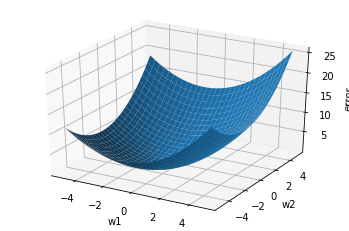

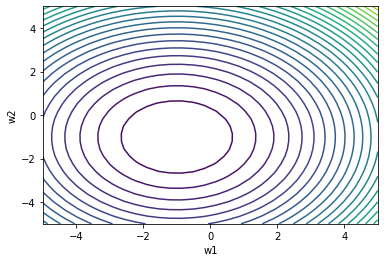

In [154]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

w0=10   #fixed w0
w1 = np.linspace(-5, 5, 30)
w2 = np.linspace(-5,5,30)
error = []
for i in w1:
    error2 = []
    for j in w2:  
        error2.append(np.mean(np.square(Ycor - w0 - i*X1 - j*X2)))
    error.append(np.asarray(error2))

error = np.asarray(error)

W1, W2 = np.meshgrid(w1, w2)
ax = plt.axes(projection='3d')
ax.plot_surface(W1,W2,error)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("error")
plt.show()
plt.contour(W1,W2,error,levels=[i for i in np.arange(0,30,1)])
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

c) Gradient descent:

-1.007922998946433 -1.0000021663003529


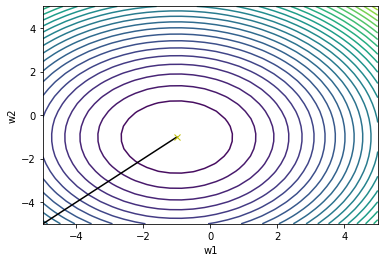

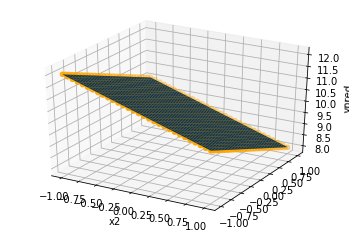

In [173]:
w1_init=[-5]
w2_init=[-5]
w0=10
eps=0.000001
while True :
    y_pred = w1_init[-1]*X1 + w2_init[-1]*X2 + w0
    del_error_w1 = (np.mean((Ycor-y_pred)*X1))*-2*0.4
    del_error_w2 = (np.mean((Ycor-y_pred)*X2))*-2*0.4
    w1_init.append(w1_init[-1] - del_error_w1)
    w2_init.append(w2_init[-1] - del_error_w2)
    if((abs(round(del_error_w1,7)) <= eps) and (abs(round(del_error_w2,7)) <= eps)) : break

y_final = np.asarray(w0 + w1_init[-1]*X1 + w2_init[-1]*X2)

print(w1_init[-1],w2_init[-1])

plt.contour(W1,W2,error,levels=[i for i in np.arange(0,30,1)])
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot(np.asarray(w2_init),np.asarray(w1_init),'black')
plt.plot(w2_init[-1],w1_init[-1],'yx')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(X1,X2,y_final,c='orange')
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("ypred")
ax.plot_surface(X1,X2,Y,)

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.04806605]
 [1.99968683]
 [3.00380461]
 [5.00175069]
 [8.99864547]
 [2.99870769]]
[[1.04787265]
 [1.99993181]
 [2.99873224]
 [4.98918605]
 [8.97945696]
 [2.99422065]]


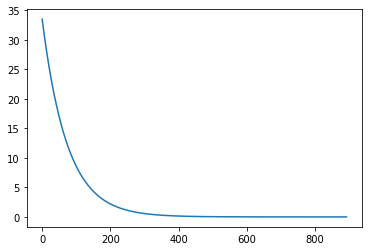

In [176]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable
    
    def grad_update(self,w_old,lr,y,x):
        return w_old + 2*lr*(x @ (y - x.T @ w_old))/y.shape[0]

    def error(self,w,y,x):
        return np.mean(np.square(y - x.T @ w))

    def mat_inv(self,y,x_aug):
        return np.linalg.pinv(x_aug @ x_aug.T) @ x_aug @ y
    # by Gradien descent
    def Regression_grad_des(self,x,y,lr):
        err = []
        w_pred = np.random.rand(len(x),1)  #random w_pred
        while self.error(w_pred,y,x) > 1e-0:
            err.append(self.error(w_pred,y,x))
            w_pred = self.grad_update(w_pred,lr,y,x)
        err = np.asarray(err)
        return w_pred , err
    
    

############################################################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# # augment feat

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois

### the data (x_aug and y is generated)#####
###############################################################################################################
# by computation (Normal equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradient descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
  

    

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

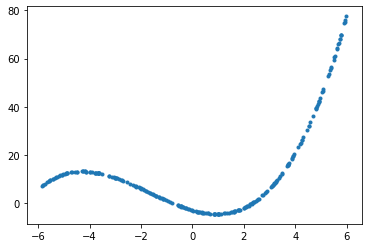

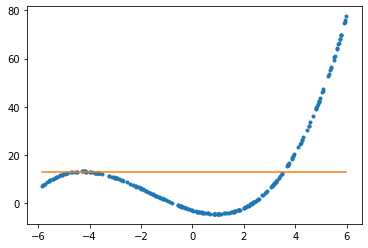

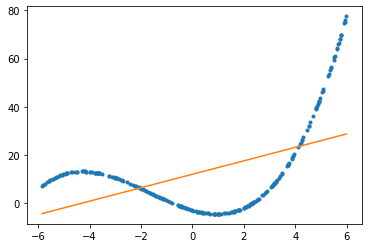

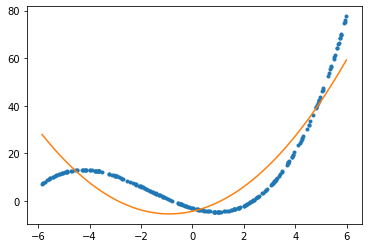

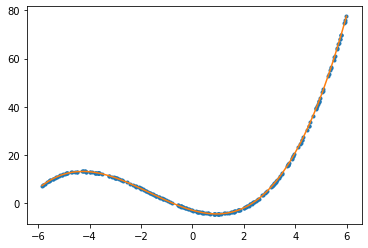

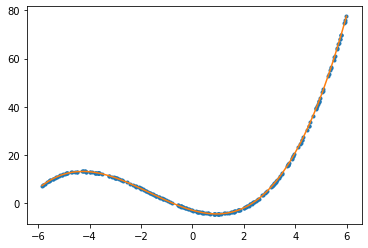

In [183]:
## data generation
x = np.sort(np.random.uniform(-6,6,(1,250)))
w=np.array([[-3],[-3],[1.25],[0.25]])
# write your code here

def data_transform(X,degree): 
    X_new=np.ones(X.shape)
    for i in range(degree): 
        X_new = np.concatenate((X_new,x**(i+1)))
    return X_new


X=data_transform(x,3)
y= X.T @ w
ycor=y+5*np.random.uniform(0,1,y.shape)
plt.plot(x.T,y,'.')
reg=regression()

# by computation

# for degree 0 polynomial fitting
degree=0
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 1 polynomial fitting
degree=1
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 2 polynomial fitting
degree=2
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 3 polynomial fitting
degree=3
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 4 polynomial fitting
degree=4
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# xx=np.linalg.pinv((X_1 @ X_1.T)) @ X_1 @ y
# print(xx.shape)

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/u/0/uc?id=15TFzgaRMaENglApfKjbNDunstoZmmz9z'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  

import numpy as np
import pandas as pd

def trainTestSplit(df,shuffle=True,augment=True):
  df_shuffled = df.sample(frac=int(shuffle)).reset_index(drop=True)
  df_train = df_shuffled.iloc[:math.ceil(0.9*len(df_shuffled)),:]
  df_test = df_shuffled.iloc[math.floor(0.9*len(df_shuffled)):,:]
  x_train = df_train.iloc[:,:-1].to_numpy()
  y_train = df_train.iloc[:,-1].to_numpy()
  x_test = df_test.iloc[:,:-1].to_numpy()
  y_test = df_test.iloc[:,-1].to_numpy()
  if augment:
    x_train = np.concatenate((np.ones((x_train.shape[0],1)), x_train),axis=1)
    x_test = np.concatenate((np.ones((x_test.shape[0],1)), x_test),axis=1)
  return x_train.T,y_train,x_test.T,y_test

# Read Data
df = pd.read_csv('data.csv')
x_train.T,y_train,x_test.T,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

reg=regression()

W_pred = reg.mat_inv(y_train,x_train)
error_train = reg.error(W_pred,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
error_test = reg.error(W_pred,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
y_pred = x_test.T @ w_pred_matrix

print('Normalized testing error=',error_train,'\n')
print('Normalized training error=',error_test,'\n')
print('predicted salary=',y_pred[0:3],'\n')
print('actual salary=',y_test[0:3])